La classification par un perceptron multi-couche sera illustrée dans un Jupyter Notebook sur l'exemple du Breast Cancer Wisconsin (Diagnostic) Dataset. Inspirez-vous de la ligne de code suivante (sklearn) :

MLPClassifier(hidden_layer_sizes='à définir', activation='à définir', solver='lbfgs', alpha=0.0001, max_iter=10000, random_state=0, max_fun=15000)

In [14]:
# Import des bibliothèques nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.datasets import load_breast_cancer

In [8]:
# Chargement du jeu de données Breast Cancer Wisconsin (Diagnostic)
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Labels

# Conversion des données en DataFrame pour une meilleure lisibilité
df = pd.DataFrame(data=np.c_[X, y], columns=data.feature_names.tolist() + ['target'])

c:\Users\Leo\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Leo\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Leo\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Leo\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

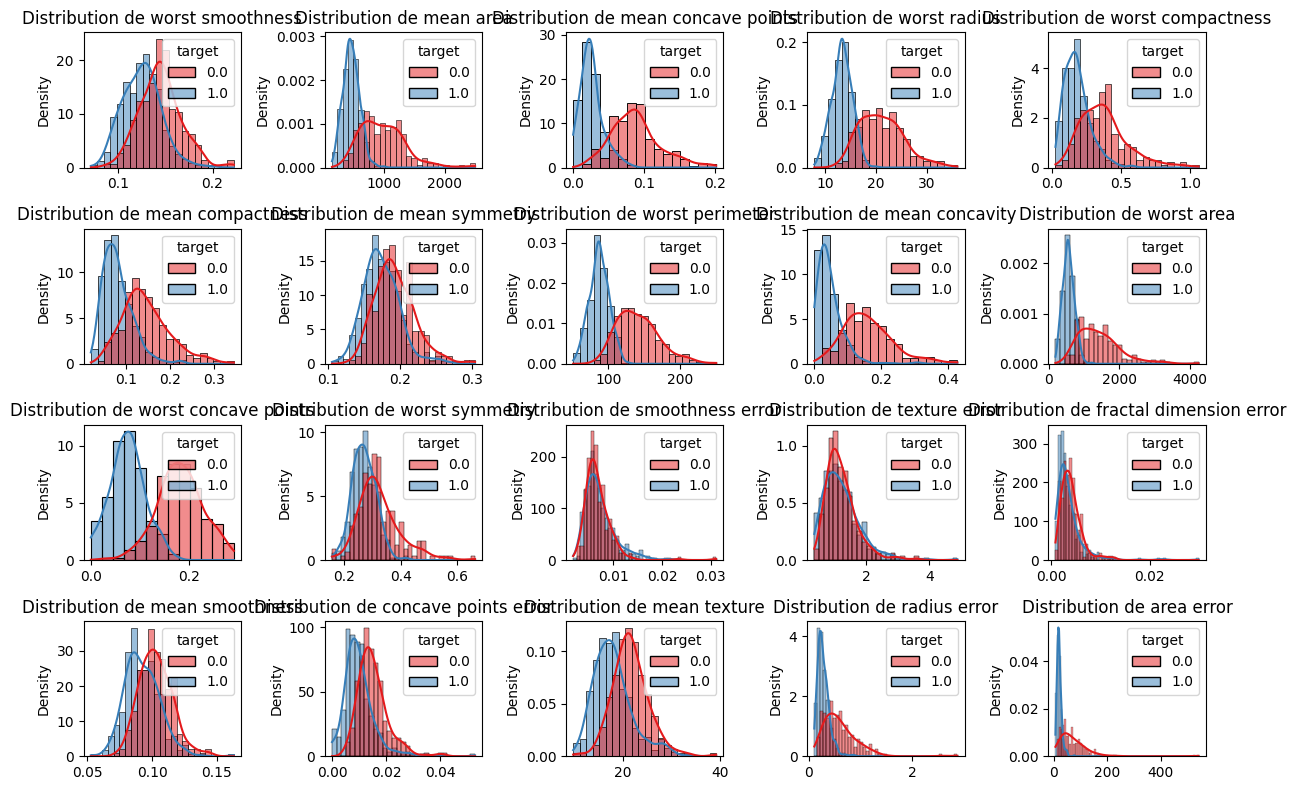

In [9]:
# Nombre maximal de sous-tracés
max_subplots = 20

# Sélection aléatoire de caractéristiques à tracer
selected_features = random.sample(data.feature_names.tolist(), min(len(data.feature_names), max_subplots))

# Tracé des distributions des caractéristiques sélectionnées
plt.figure(figsize=(12, 8))
for i, feature in enumerate(selected_features):
    plt.subplot(4, 5, i + 1)
    sns.histplot(data=df, x=feature, hue='target', kde=True, stat='density', common_norm=False, palette='Set1')
    plt.title(f'Distribution de {feature}')
    plt.xlabel('')
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

In [10]:
# Séparation des données en ensembles de formation et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Initialisation du classificateur MLP avec certains paramètres par défaut
mlp = MLPClassifier(max_iter=1000, random_state=42)

# Définition de la grille des hyperparamètres à tester
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],  # Différentes architectures de couches cachées
    'activation': ['relu', 'tanh'],  # Fonctions d'activation à tester
    'alpha': [0.0001, 0.001, 0.01],  # Paramètre de régularisation
}

# Initialisation de la recherche sur grille avec cross-validation
grid_search = GridSearchCV(mlp, param_grid, cv=3, n_jobs=-1)

# Exécution de la recherche sur grille pour trouver le meilleur modèle
grid_search.fit(X_train_scaled, y_train)

# Sélection du meilleur modèle trouvé par la recherche sur grille
best_mlp = grid_search.best_estimator_

In [12]:
# Prédiction sur l'ensemble de test avec le meilleur modèle
y_pred = best_mlp.predict(X_test_scaled)

# Calcul de la précision du modèle
accuracy = accuracy_score(y_test, y_pred)

# Génération du rapport de classification
classification_rep = classification_report(y_test, y_pred, target_names=data.target_names)

# Affichage de la précision et du rapport de classification
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

   malignant       0.98      0.95      0.96        43
      benign       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



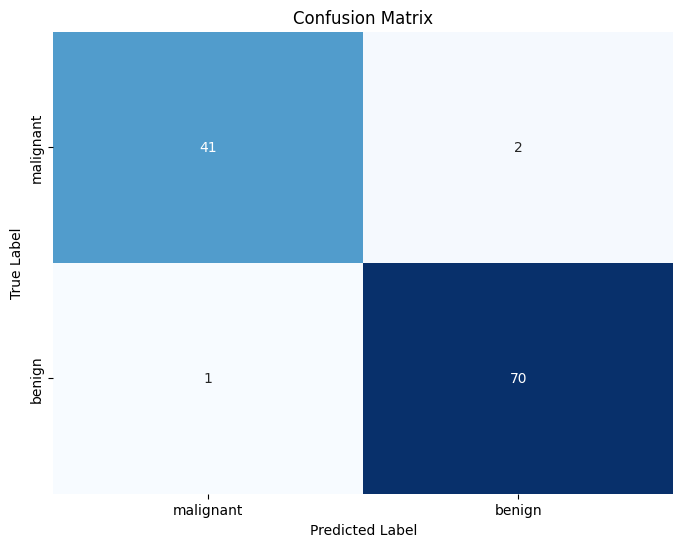

In [15]:
# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()